# Set de datos

## Variables
- Entradas
    - **age** (edad): La edad del individuo.
    - **workclass** (clase de trabajo): El estado laboral del individuo.
    - **fnlwgt** (peso final): Valor calculado que representa el número de personas que la observación está destinada a representar.
    - **education** (educación): El nivel más alto de educación alcanzado por el individuo.
    - **education-num** (número de años de educación): El número de años de educación que el individuo ha completado.
    - **marital-status** (estado civil): El estado civil del individuo.
    - **occupation** (ocupación): El tipo de trabajo que realiza el individuo.
    - **relationship** (relación): La relación familiar del individuo.
    - **race** (raza): La raza del individuo.
    - **sex** (sexo): El género del individuo.
    - **capital-gain** (ganancia de capital): Ingresos provenientes de fuentes de inversión, aparte del salario/sueldos.
    - **capital-loss** (pérdida de capital): Pérdidas provenientes de fuentes de inversión.
    - **hours-per-week** (horas por semana): El número de horas que el individuo trabaja por semana.
    - **native-country** (país de origen): El país de origen del individuo.
- Salida
    - **income** (ingresos): El rango de ingresos del individuo (<=50K o >50K).


[archive.ics.uci.edu](https://archive.ics.uci.edu/dataset/20/census+income)

# Citación
Kohavi,Ron. (1996). Census Income. UCI Machine Learning Repository. https://doi.org/10.24432/C5GP7S.

# Objetivo
La tarea de predicción es determinar si una persona gana más de 50K al año.

In [18]:
# Importación de librerias
!{sys.executable} -m pip install pandas numpy seaborn matplotlib scikit-learn tensorflow
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [19]:
# Analicemos el set de datos
data = pd.read_csv('./data/census_income.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [20]:
# Revisemos cuantos registros en total tenemos y cuantas características
data.shape

(48842, 15)

Tenemos un total de *48.842* registros y *15* características
Veamos si hay registros faltantes en alguna de nuestras características

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


No existen datos faltantes en nuestro set de datos

Analicemos ahora las características de nuestro set de datos

In [22]:
# Separemos las características numéricas de las categóricas

categorical_features = []
numerical_features = []
for col in data.columns.tolist():
    if data[col].dtype == 'object':
        categorical_features.append(col)
    else:
        numerical_features.append(col)

# Analicemos nuestras características numéricas

In [23]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


# Análisis

- No existen valores negativos en ninguna característica
- *capital-gain* y *capital-loss* pueden estar afectados por valores extremos (outliers)

Grafiquemos nuestras características numéricas

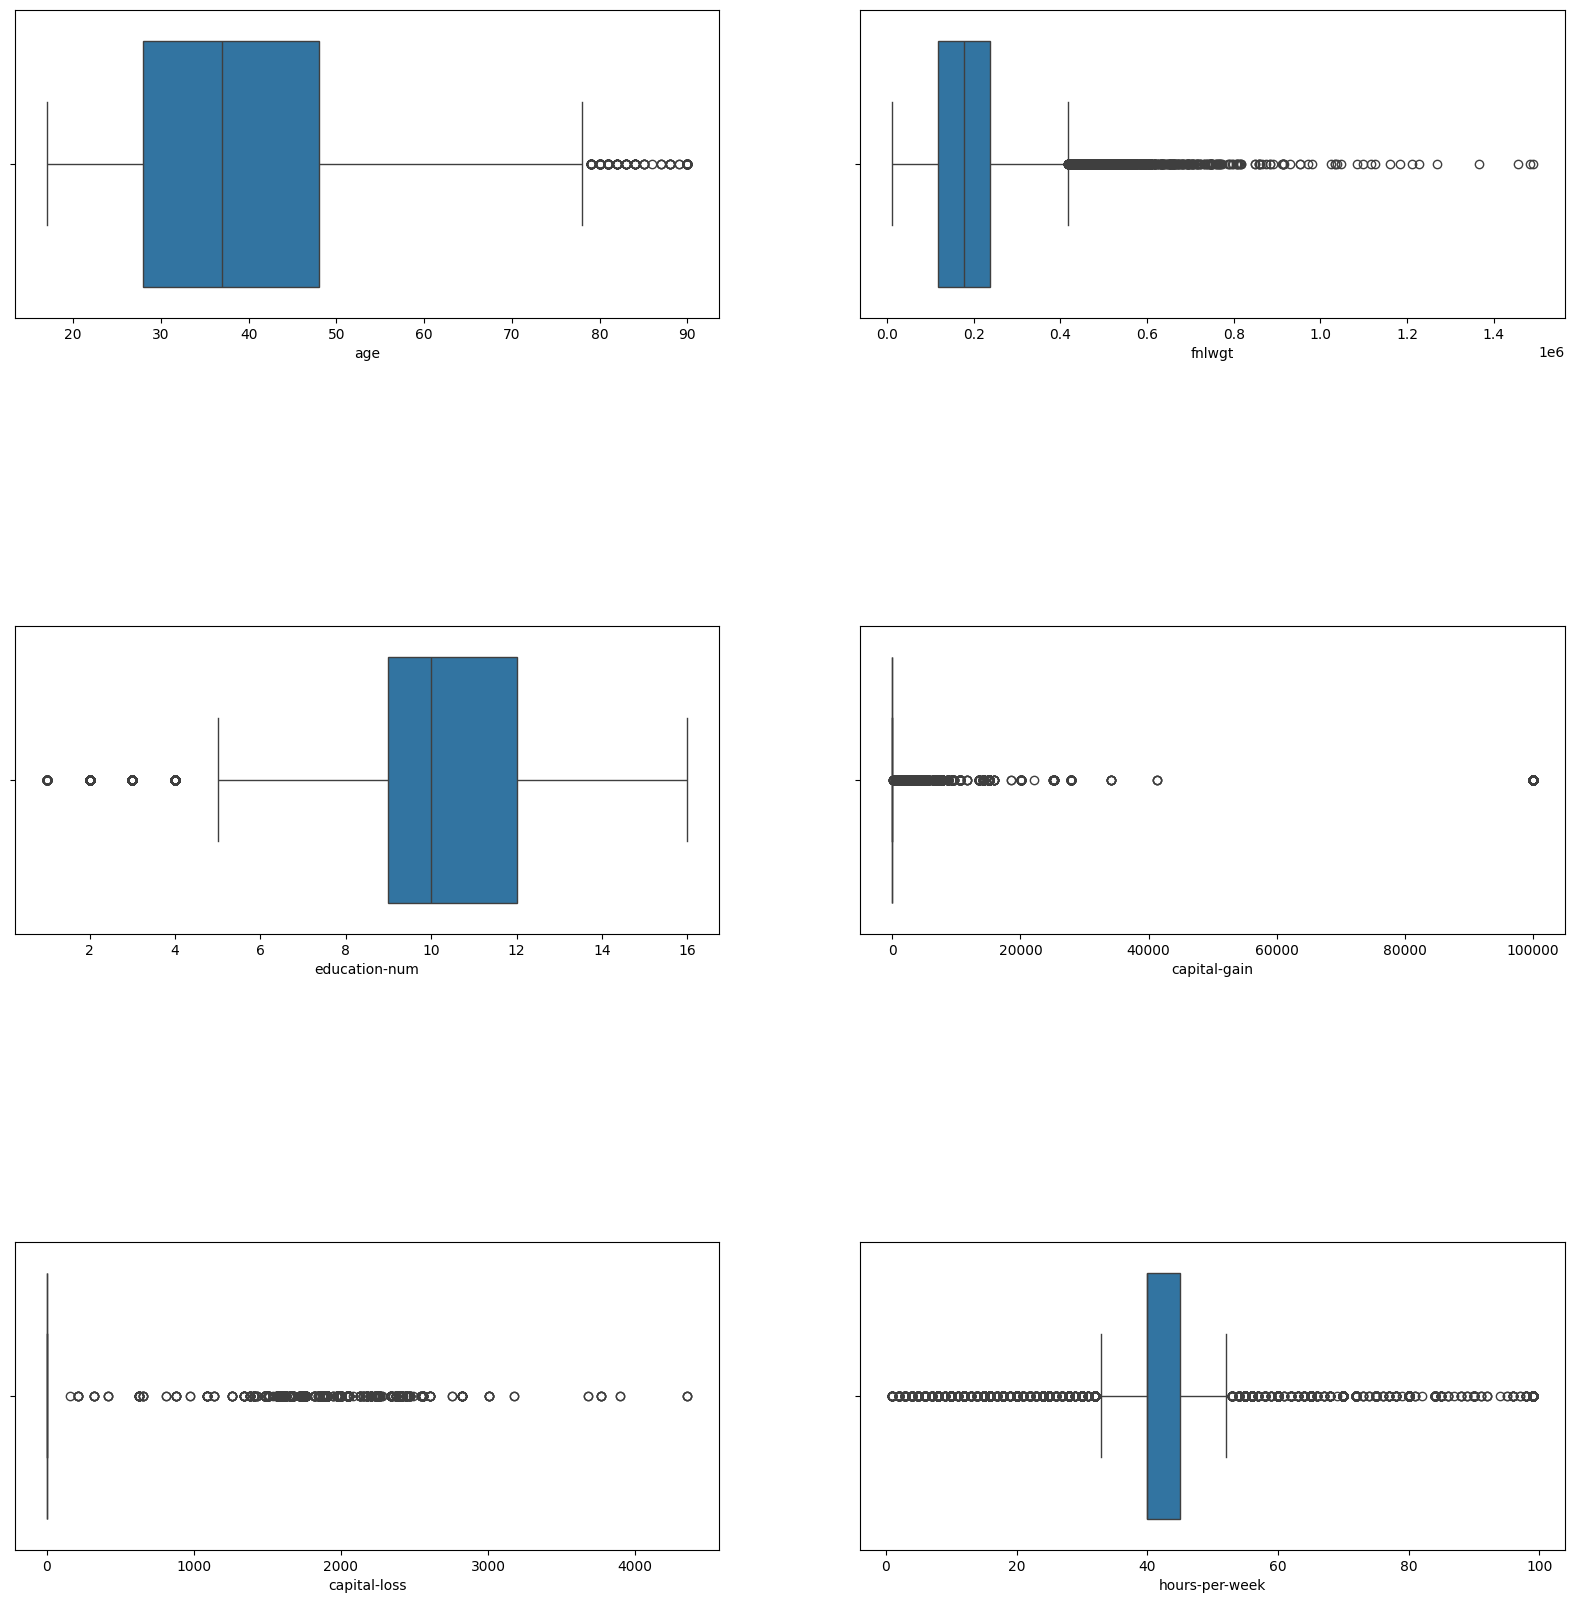

In [24]:
# Iniciemos con gráficas de boxplot
fig, ax = plt.subplots(nrows=round(len(numerical_features)/2), ncols=2, figsize=(20, 20))
fig.subplots_adjust(hspace=1)
y = 0
for col in numerical_features:
    i,j = divmod(y, 2)
    sns.boxplot(x=col, data=data, ax=ax[i, j])
    y = y+1

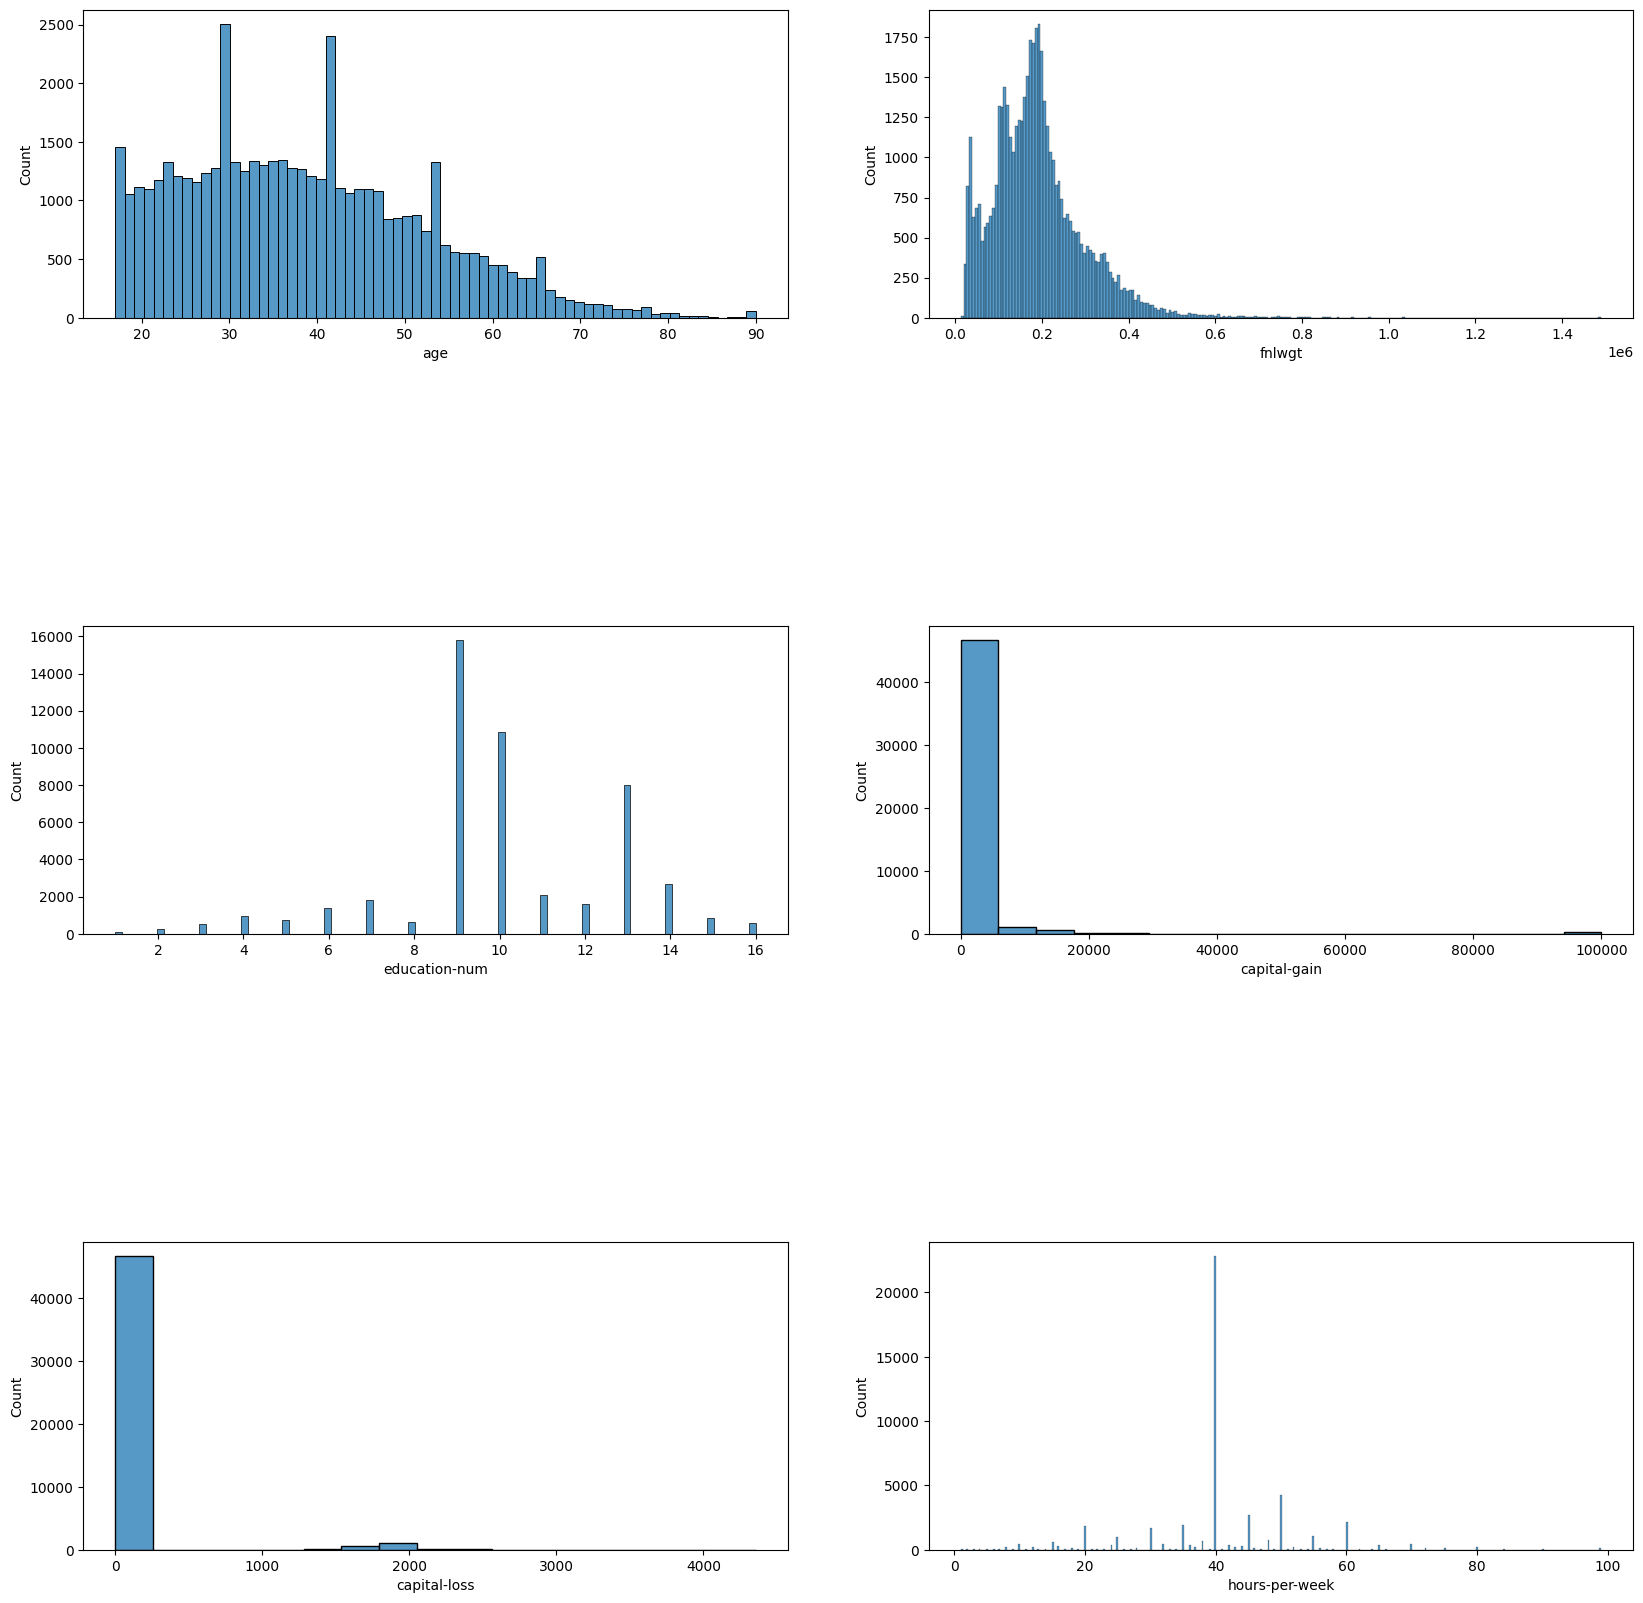

In [25]:
# Ahora analicemos un poco nuestra distribución
fig, ax = plt.subplots(nrows=round(len(numerical_features)/2), ncols=2, figsize=(20, 20))
fig.subplots_adjust(hspace=1)
y = 0
for col in numerical_features:
    i,j = divmod(y, 2)
    sns.histplot(x=col, data=data, ax=ax[i, j])
    y = y+1

# Nota
Podemos observar que nuestras variables numéricas, tienen rangos de valores muy diferentes, estas deben ser **escaladas** antes de ingresarlas a nuestra red neuronal

# Analicemos nuestras características categóricas

In [26]:
# Analicemos si hay características irrelevantes
categorical_features_unique = []
for col in categorical_features:
    if data[col].nunique() <= 1:
        categorical_features_unique.append(col)
categorical_features_unique

[]

In [27]:
# Analicemos si hay datos duplicados y lo eliminaremos
data.drop_duplicates(inplace=True)
data.shape

(48813, 15)

In [28]:
# Veamos los subniveles de nuestras características categóricas
for col in categorical_features:
    print(f'Column: {col}')
    print(f'Unique values: {data[col].unique().tolist()}')

Column: workclass
Unique values: ['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov', 'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked']
Column: education
Unique values: ['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college', 'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school', '5th-6th', '10th', '1st-4th', 'Preschool', '12th']
Column: marital-status
Unique values: ['Never-married', 'Married-civ-spouse', 'Divorced', 'Married-spouse-absent', 'Separated', 'Married-AF-spouse', 'Widowed']
Column: occupation
Unique values: ['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners', 'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair', 'Transport-moving', 'Farming-fishing', 'Machine-op-inspct', 'Tech-support', '?', 'Protective-serv', 'Armed-Forces', 'Priv-house-serv']
Column: relationship
Unique values: ['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried', 'Other-relative']
Column: race
Unique values: ['White', 'Black', 'Asian-Pac-Isla

In [29]:
# data.replace('?', np.nan, inplace=True)
# data.dropna(inplace=True)
# data.shape
data.replace('?', 'Not-specified', inplace=True)
data.replace('<=50K.', '<=50K', inplace=True, regex=False)
data.replace('>50K.', '>50K', inplace=True, regex=False)
data.shape

(48813, 15)

# Preprocesamiento de nuestro set de datos
>Es el conjunto de técnicas y operaciones que se aplican a un conjunto de datos antes de entrenarlo en una red neuronal. Su objetivo principal es transformar los datos crudos en una representación numérica adecuada, limpia y consistente que maximice el rendimiento del modelo.
>
>¿Por qué es importante?
>
>- Mejora la calidad de los datos: Elimina errores, inconsistencias y valores atípicos que podrían confundir a la red neuronal.
>- Aumenta la eficiencia del entrenamiento: Datos bien preprocesados convergen más rápido y con mayor precisión.
>- Facilita la interpretación de los resultados: Datos escalados y normalizados permiten una mejor comprensión de la importancia de cada característica.

## ¿Qué haremos?
- Transformar nuestras características categóricas en formato **one-hot**
- Transformar nuestra variable de salida en formato binario
- Escalar las variables numéricas dentro del rango [0,1]
- Separar nuestro set de datos en entrenamiento y pruebas

### 1- Transformar nuestras características categóricas en formato **one-hot**

In [30]:
data_processed = pd.get_dummies(data, columns=categorical_features[:-1])
data_processed.shape

(48813, 109)

In [31]:
data_processed

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,2174,0,40,<=50K,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,83311,13,0,0,13,<=50K,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,215646,9,0,0,40,<=50K,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,234721,7,0,0,40,<=50K,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,338409,13,0,0,40,<=50K,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,215419,13,0,0,36,<=50K,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48838,64,321403,9,0,0,40,<=50K,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48839,38,374983,13,0,0,50,<=50K,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48840,44,83891,13,5455,0,40,<=50K,False,False,False,...,False,False,False,False,False,False,False,True,False,False


### 2- Transformar nuestra variable de salida en formato binario

- $\leq 50K  \to 0$ 

- $> 50K  \to 1$ 

In [32]:
data_processed = pd.get_dummies(data_processed, columns=['income'],drop_first=True)
data_processed

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Not-specified,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,39,77516,13,2174,0,40,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,50,83311,13,0,0,13,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,38,215646,9,0,0,40,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,53,234721,7,0,0,40,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,28,338409,13,0,0,40,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,215419,13,0,0,36,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
48838,64,321403,9,0,0,40,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
48839,38,374983,13,0,0,50,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
48840,44,83891,13,5455,0,40,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


### 3- Escalar las variables numéricas dentro del rango [0,1]

In [33]:
from sklearn.preprocessing import MinMaxScaler
scalers = {}
for col in numerical_features:
    scalers[col] = MinMaxScaler()
    data_processed.loc[:,col] = scalers[col].fit_transform(data_processed[col].to_numpy().reshape(-1,1))
data_processed

/tmp/ipykernel_76467/747200562.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.30136986 0.45205479 0.28767123 ... 0.28767123 0.36986301 0.24657534]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_processed.loc[:,col] = scalers[col].fit_transform(data_processed[col].to_numpy().reshape(-1,1))
/tmp/ipykernel_76467/747200562.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.04413121 0.04805174 0.13758131 ... 0.24537874 0.04844413 0.11491866]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_processed.loc[:,col] = scalers[col].fit_transform(data_processed[col].to_numpy().reshape(-1,1))
/tmp/ipykernel_76467/747200562.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.8     

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Not-specified,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,0.301370,0.044131,0.800000,0.021740,0.0,0.397959,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,0.452055,0.048052,0.800000,0.000000,0.0,0.122449,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,0.287671,0.137581,0.533333,0.000000,0.0,0.397959,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,0.493151,0.150486,0.400000,0.000000,0.0,0.397959,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,0.150685,0.220635,0.800000,0.000000,0.0,0.397959,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.301370,0.137428,0.800000,0.000000,0.0,0.357143,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
48838,0.643836,0.209130,0.533333,0.000000,0.0,0.397959,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
48839,0.287671,0.245379,0.800000,0.000000,0.0,0.500000,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
48840,0.369863,0.048444,0.800000,0.054551,0.0,0.397959,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


### 4- Separar nuestro set de datos en entrenamiento y pruebas

- El set de entrenamiento permite obtener de forma automática los parámetros del modelo (80% de los datos)
- El set de prueba se usa para generar predicciones con el modelo entrenado (20% de los datos)


In [34]:
# Debemos mezclar aleatoriamente nuestros datos
data_random = data_processed.sample(frac=1,random_state=123)
data_random

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Not-specified,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
15521,0.506849,0.201939,0.800000,0.00000,0.000000,0.397959,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
40104,0.095890,0.151640,0.600000,0.00000,0.000000,0.397959,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
36538,0.164384,0.126398,0.533333,0.02407,0.000000,0.397959,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
47695,0.013699,0.071423,0.400000,0.00000,0.000000,0.397959,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
20356,0.630137,0.076901,0.533333,0.02174,0.000000,0.397959,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7765,0.082192,0.147850,0.800000,0.00000,0.000000,0.397959,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
15383,0.520548,0.030011,0.800000,0.00000,0.000000,0.397959,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
17737,0.369863,0.159638,0.200000,0.00000,0.000000,0.500000,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
28047,0.287671,0.065588,0.533333,0.00000,0.000000,0.397959,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [35]:
# Definimos el tamaño de nuestros nuevos set de datos
TOTAL = data_random.shape[0]
TOTAL_TRAINING = int(0.8*TOTAL)
TOTAL_TESTING = int(0.2*TOTAL)

# Seleccionamos nuestras filas
data_training = data_random.iloc[0:TOTAL_TRAINING,:]
data_testing = data_random.iloc[TOTAL_TRAINING:,:]

# Arreglos de entradas y salidas a nuestra red neuronal

Para cada set de datos haremos lo siguiente
- Crearemos el arreglo x que será la entrada al modelo y que tomará las primeras 78 columnas
- Crearemos el arreglo y que será la salida que debe aprender a predecir el modelo y que corresponde a la última columna
- Para extraer los valores en formato NumPy usaremos el método to_numpy y agregaremos el argumento dtype=np.float64 para convertir los valores al formato de punto flotante adecuado para Keras

In [36]:
# TRAINING
x_training = data_training.iloc[:,:data_training.shape[1]-1].to_numpy(dtype=np.float64)
y_training = data_training.iloc[:,data_training.shape[1]-1].to_numpy(dtype=np.float64)
# TESTING
x_testing = data_testing.iloc[:,:data_testing.shape[1]-1].to_numpy(dtype=np.float64)
y_testing = data_testing.iloc[:,data_testing.shape[1]-1].to_numpy(dtype=np.float64)

# Red neuronal

2024-09-14 12:37:44.066331: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-14 12:37:44.068768: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-14 12:37:44.072957: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-14 12:37:44.087977: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-14 12:37:44.109430: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

Training model...
Model trained...


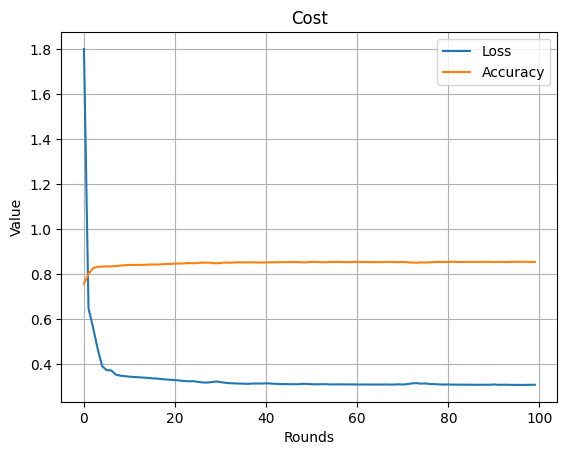

In [37]:
import tensorflow as tf
# Definimos el modelo
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(data_random.shape[1]-1,)),
    tf.keras.layers.Dense(units=64, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units=32, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units=1, activation=tf.keras.activations.sigmoid),
])

# Compilamos el modelo
model.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(0.1),
               metrics=['accuracy'])
# Entrenamos el modelo con solamente los datos de entrada y salida para dejar que la red neuronal adapte sus pesos y sesgos
print("Training model...")
historial = model.fit(x_training, y_training, epochs=100, verbose=0, batch_size=10000)
print("Model trained...")
# Veamos la función de costo y la exactitud
fig, ax = plt.subplots()
plt.xlabel("Rounds")
ax.plot(historial.history['loss'], label='Loss')
ax.plot(historial.history['accuracy'],label='Accuracy')
ax.grid(True)
plt.title("Cost")
plt.ylabel("Value")
plt.legend()

In [38]:
#Evaluemos el modelo
model.evaluate(x_testing, y_testing)

306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8548 - loss: 0.3145


[0.318276047706604, 0.8508654832839966]

Predicting values
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


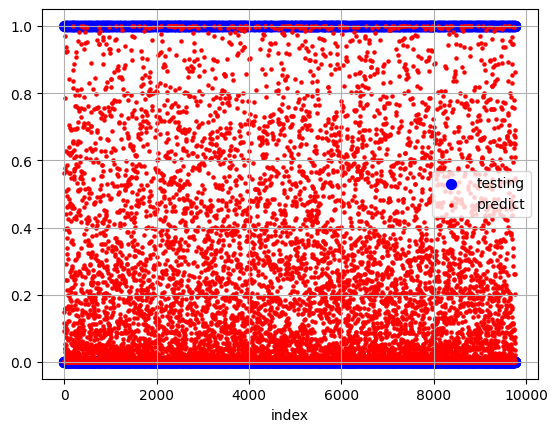

In [39]:
# Validemos la predicción del modelo para el set de datos de pruebas
print("Predicting values")
predict = model.predict(x_testing)
# Grafiquemos lo obtenido
dataset_predict = pd.DataFrame(predict, columns=['y_predict'])
dataset_testing = pd.DataFrame(y_testing, columns=['y_testing'])
final = pd.concat([dataset_predict, dataset_testing], ignore_index=False, sort=False)
fig, ax = plt.subplots()
plt.xlabel("index")
ax.scatter(final.index, final['y_testing'], color='blue', label='testing', s=50)
ax.scatter(final.index, final['y_predict'], color='red', label='predict', s=5)
ax.grid(True)
plt.legend()
